In [38]:
%matplotlib inline
from __future__ import unicode_literals
import classifiers
import re
import nltk
from Politweet import get_tweets, get_transcript
import ratings
from sentiment import polarity_train, classify, prob_classify, plus_df, minus_df
import pandas as pd
from gensim import corpora, models, similarities
from itertools import chain
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import re
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', 1200)

tweets = get_tweets("./datasets/tweets.tsv")
articles = [" ".join(tweet["tokens"]) for i,tweet in tweets.iterrows()]
articles[:3]

[u'watch drink wait start cringing mccain blunder',
 u"@ahg3 @michdot yeah slime actually second choice ca n't say first one okay roll",
 u'prepare heart attack']

In [36]:
import collections
import string
from pprint import pprint


def cluster_texts(texts, clusters=20):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(min_df=0.01, max_df=1.0, lowercase=False)
 
    tfidf_model = vectorizer.fit_transform(texts)
    inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        try:
            clustering[label].append(inv_map[idx])
        except:
            pass
 
    return clustering, km_model, tfidf_model


clusters, km_model, X = cluster_texts(articles, 6)
pprint(dict(clusters))

{0: [u'current',
     u'economy',
     u'go',
     u'make',
     u'really',
     u'tell',
     u'think',
     u'time',
     u'tonight',
     u'try',
     u'understand',
     u've',
     u'world',
     u'wow'],
 1: [u'com', u'debate', u'even'],
 2: [u'agree',
     u'anyone',
     u'biden',
     u'call',
     u'cnn',
     u'come',
     u'could',
     u'country',
     u'cut',
     u'debate08',
     u'fact',
     u'first',
     u'foreign',
     u'get',
     u'give',
     u'good',
     u'guy',
     u'http',
     u'iran',
     u'iraq',
     u'issue',
     u'john',
     u'keep',
     u'know',
     u'like',
     u'look',
     u'love',
     u'mccain',
     u'miss',
     u'much',
     u'need',
     u'next',
     u'obama',
     u'oh',
     u'ok',
     u'old',
     u'one',
     u'pakistan',
     u'palin',
     u'people',
     u'plan',
     u'pow',
     u'president',
     u'question',
     u'say',
     u'seem',
     u'spending',
     u'still',
     u'stop',
     u'take',
     u'talk',
     u'tax',


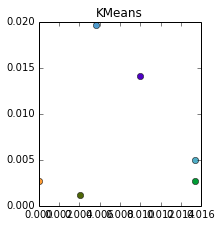

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9ACC', '#4E00C5', '#009C34', '#4E6606']


# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(10), colors):
    my_members = km_model.labels_ == k
    cluster_center = km_model.cluster_centers_[k]
#     ax.plot(X[my_members, 0], X[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')

